In [2]:
library(data.table)
library(tidyverse)
df=read_csv('diabetes.csv')

#普通glm、Xgboost

Warning message:
"package 'data.table' was built under R version 3.6.1"Warning message:
"package 'tidyverse' was built under R version 3.6.1"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.2.0     √ purrr   0.3.2
√ tibble  2.1.3     √ dplyr   0.8.3
√ tidyr   0.8.3     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.1"Warning message:
"package 'tidyr' was built under R version 3.6.1"Warning message:
"package 'readr' was built under R version 3.6.1"Warning message:
"package 'purrr' was built under R version 3.6.1"Warning message:
"package 'dplyr' was built under R version 3.6.1"Warning message:
"package 'stringr' was built under R version 3.6.1"Warning message:
"package 'forcats' was built under R version 3.6.1"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::fil

In [14]:
head(df)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [15]:
df[rowSums( is.na( df) )>0,]
#得知数据集没有na形式的缺失值，但是观察到其实是有的，NA或者0.
#bloodpressure不可能是0，BMI不可能是0，血糖也不可能是0,所以mice这三个变量

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [16]:
library(ggplot2)

In [17]:
glup=ggplot(df,aes(df$Glucose))+
geom_density()

In [18]:
bpp=ggplot(df,aes(df$BloodPressure))+
geom_density()

In [19]:
bmip=ggplot(df,aes(df$BMI))+
geom_density()

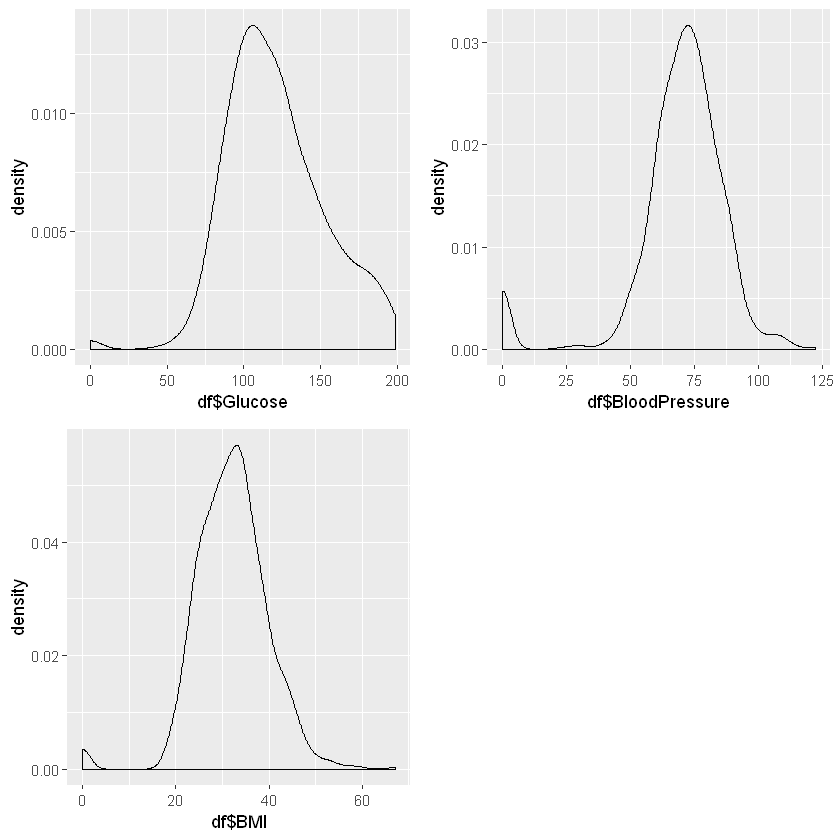

In [20]:
grid.arrange(glup,bpp,bmip,nrow=2)

In [21]:
library(mice)

Warning message:
"package 'mice' was built under R version 3.6.1"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.1"
Attaching package: 'mice'

The following object is masked from 'package:tidyr':

    complete

The following objects are masked from 'package:base':

    cbind, rbind



In [22]:
glu=df$Glucose
glu=ifelse(glu==0,NA,glu)
df$Glucose=glu

In [23]:
bp=df$BloodPressure
bp=ifelse(bp==0,NA,bp)
df$BloodPressure=bp

In [24]:
bmi=df$BMI
bmi=ifelse(bmi==0,NA,bmi)
df$BMI=bmi

In [25]:
library(VIM)

Warning message:
"package 'VIM' was built under R version 3.6.1"Loading required package: colorspace
Warning message:
"package 'colorspace' was built under R version 3.6.1"Loading required package: grid
Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4
VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: 'VIM'

The following object is masked from 'package:datasets':

    sleep




 Variables sorted by number of missings: 
                 Variable       Count
            BloodPressure 0.045572917
                      BMI 0.014322917
                  Glucose 0.006510417
              Pregnancies 0.000000000
            SkinThickness 0.000000000
                  Insulin 0.000000000
 DiabetesPedigreeFunction 0.000000000
                      Age 0.000000000
                  Outcome 0.000000000


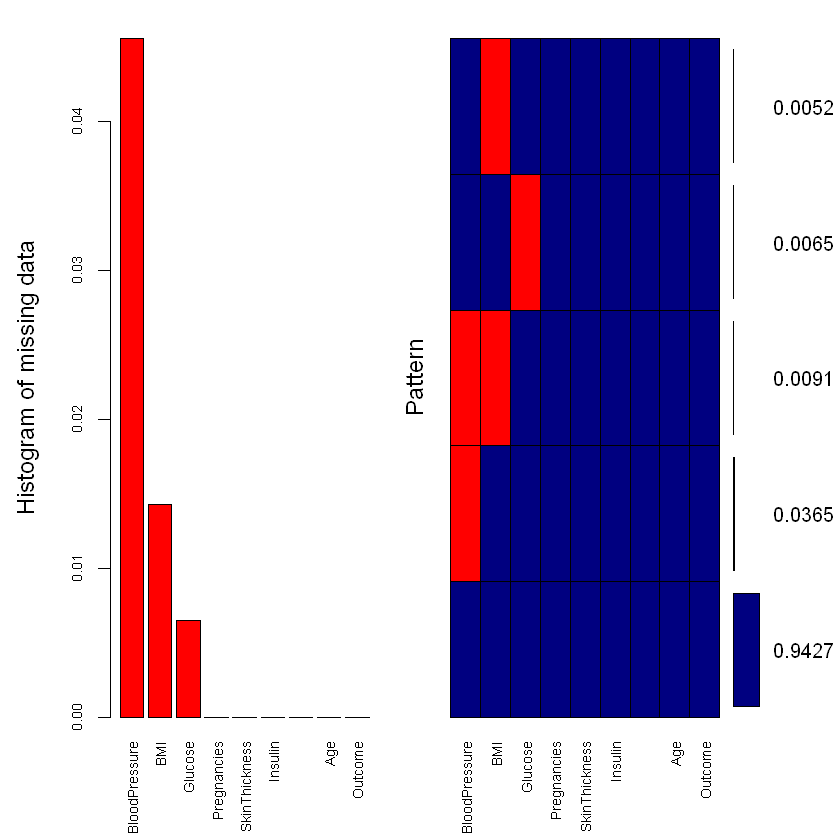

In [12]:
aggr_plot <- aggr(df, col=c('navyblue','red'), numbers=TRUE, sortVars=TRUE, labels=names(data), cex.axis=.7, gap=3, ylab=c("Histogram of missing data","Pattern"))

In [88]:
df

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,NA,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,NA,0.232,54,1


In [26]:
tempdata=mice(df,m=5,maxit=50)


 iter imp variable
  1   1  Glucose  BloodPressure  BMI
  1   2  Glucose  BloodPressure  BMI
  1   3  Glucose  BloodPressure  BMI
  1   4  Glucose  BloodPressure  BMI
  1   5  Glucose  BloodPressure  BMI
  2   1  Glucose  BloodPressure  BMI
  2   2  Glucose  BloodPressure  BMI
  2   3  Glucose  BloodPressure  BMI
  2   4  Glucose  BloodPressure  BMI
  2   5  Glucose  BloodPressure  BMI
  3   1  Glucose  BloodPressure  BMI
  3   2  Glucose  BloodPressure  BMI
  3   3  Glucose  BloodPressure  BMI
  3   4  Glucose  BloodPressure  BMI
  3   5  Glucose  BloodPressure  BMI
  4   1  Glucose  BloodPressure  BMI
  4   2  Glucose  BloodPressure  BMI
  4   3  Glucose  BloodPressure  BMI
  4   4  Glucose  BloodPressure  BMI
  4   5  Glucose  BloodPressure  BMI
  5   1  Glucose  BloodPressure  BMI
  5   2  Glucose  BloodPressure  BMI
  5   3  Glucose  BloodPressure  BMI
  5   4  Glucose  BloodPressure  BMI
  5   5  Glucose  BloodPressure  BMI
  6   1  Glucose  BloodPressure  BMI
  6   2  Glucose  

In [14]:
tempdata

Class: mids
Number of multiple imputations:  5 
Imputation methods:
             Pregnancies                  Glucose            BloodPressure 
                      ""                    "pmm"                    "pmm" 
           SkinThickness                  Insulin                      BMI 
                      ""                       ""                    "pmm" 
DiabetesPedigreeFunction                      Age                  Outcome 
                      ""                       ""                       "" 
PredictorMatrix:
              Pregnancies Glucose BloodPressure SkinThickness Insulin BMI
Pregnancies             0       1             1             1       1   1
Glucose                 1       0             1             1       1   1
BloodPressure           1       1             0             1       1   1
SkinThickness           1       1             1             0       1   1
Insulin                 1       1             1             1       0   1
BMI            

In [27]:
completedDf=complete(tempdata)

In [16]:
completedDf

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,48,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,31.2,0.232,54,1


In [17]:
table(completedDf$Outcome)


  0   1 
500 268 

In [18]:
500/(500+268)

[1] 0.6510417

In [12]:
library(caTools)

Warning message:
"package 'caTools' was built under R version 3.6.1"

In [28]:
split = sample.split( completedDf$Outcome, SplitRatio=0.65 )  
train=subset(completedDf, split==TRUE) 
test=subset(completedDf,split==FALSE)

In [29]:
glm1=glm(Outcome~.,data=train,family=binomial)

In [22]:
glm1


Call:  glm(formula = Outcome ~ ., family = binomial, data = train)

Coefficients:
             (Intercept)               Pregnancies                   Glucose  
              -9.4795371                 0.1346427                 0.0406763  
           BloodPressure             SkinThickness                   Insulin  
              -0.0056765                -0.0008505                -0.0016980  
                     BMI  DiabetesPedigreeFunction                       Age  
               0.0946509                 0.6659264                 0.0103850  

Degrees of Freedom: 498 Total (i.e. Null);  490 Residual
Null Deviance:	    645.3 
Residual Deviance: 447.4 	AIC: 465.4

In [30]:
predictTrain=predict(glm1,type='response')

In [24]:
tapply(predictTrain,train$Outcome,mean)

0         1 
0.2234296 0.5826746

In [31]:
table(train$Outcome,predictTrain>0.6)

   
    FALSE TRUE
  0   297   28
  1    91   83

In [27]:
(298+92)/(302+23+89+85)

[1] 0.7815631

In [32]:
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 3.6.1"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.1"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



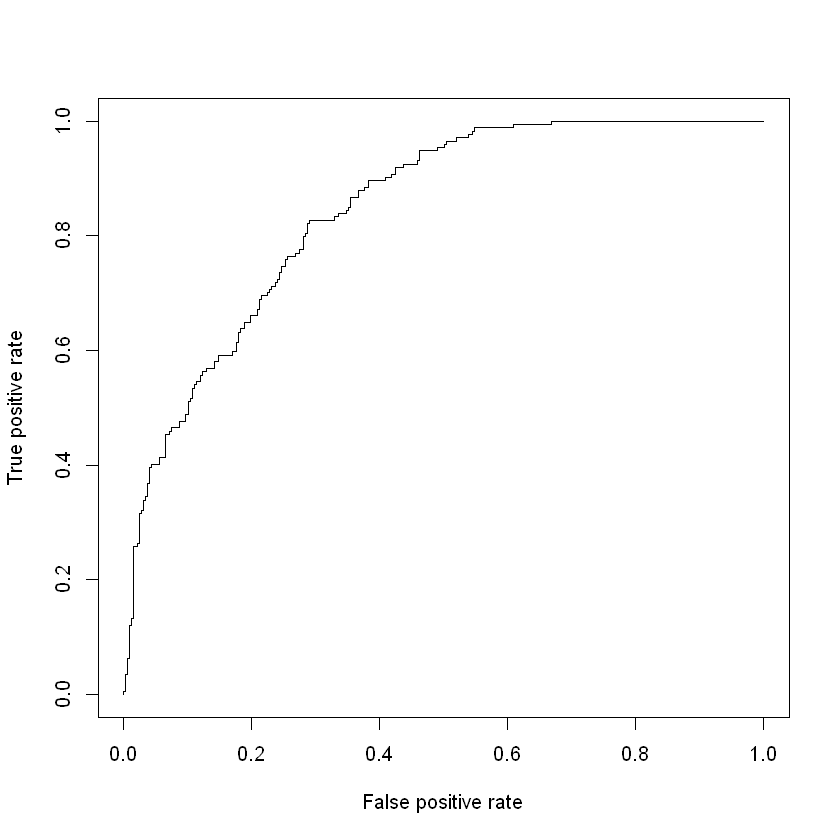

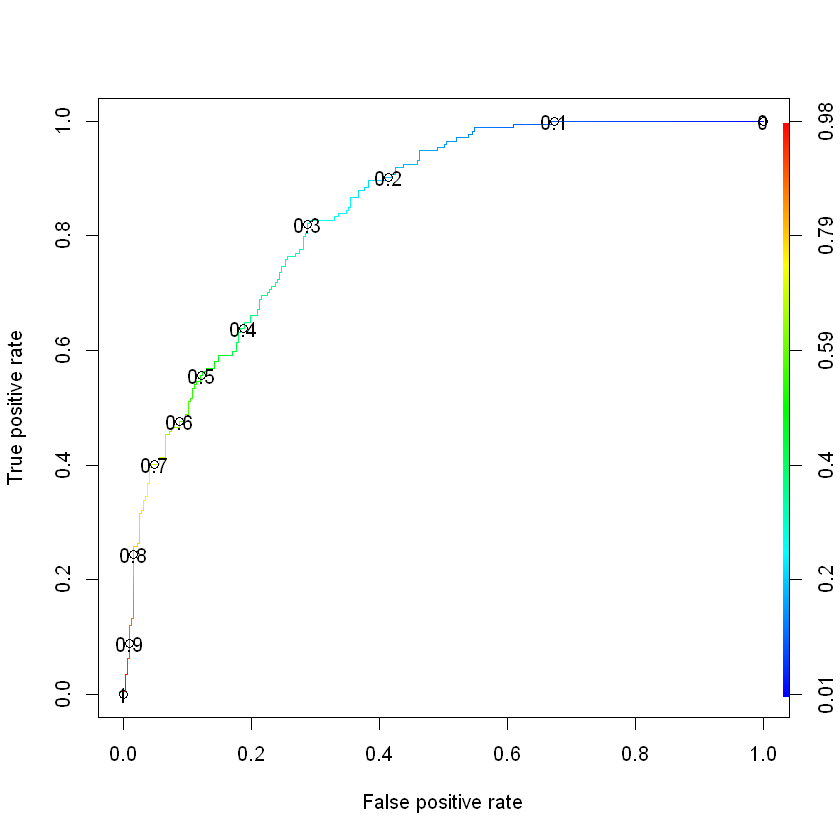

In [33]:
ROCRpred=prediction(predictTrain,train$Outcome)
ROCRperf = performance( ROCRpred, "tpr", "fpr") 
plot(ROCRperf)
plot(ROCRperf, colorize=TRUE)
plot(ROCRperf, colorize=TRUE, print.cutoffs.at = seq(0,1,0.1)) 

In [34]:
predictTest=predict(glm1,newdata=test,type='response')

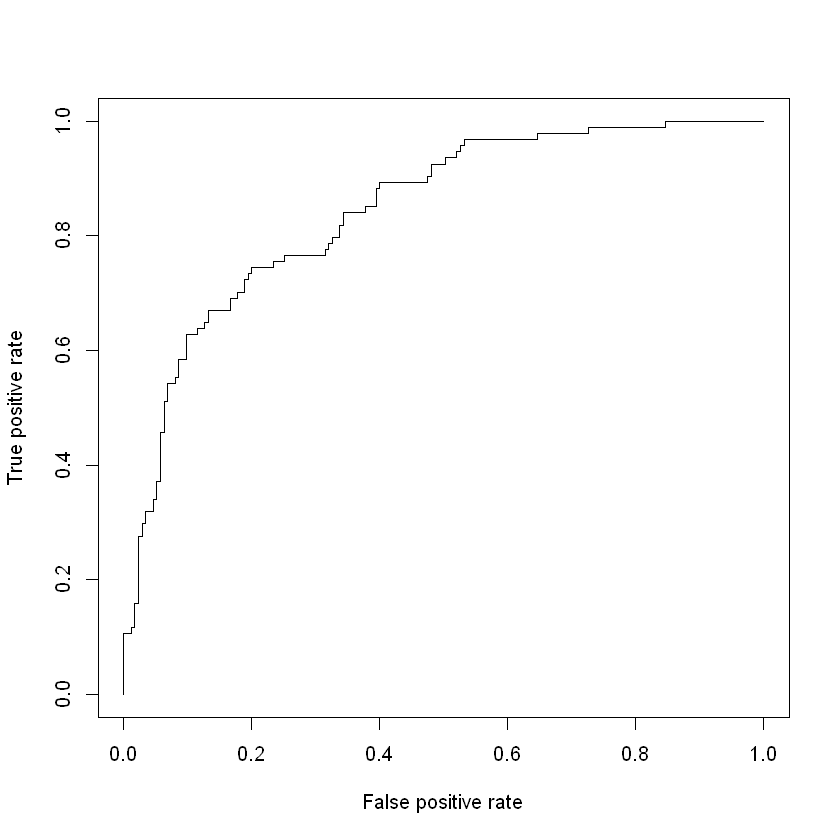

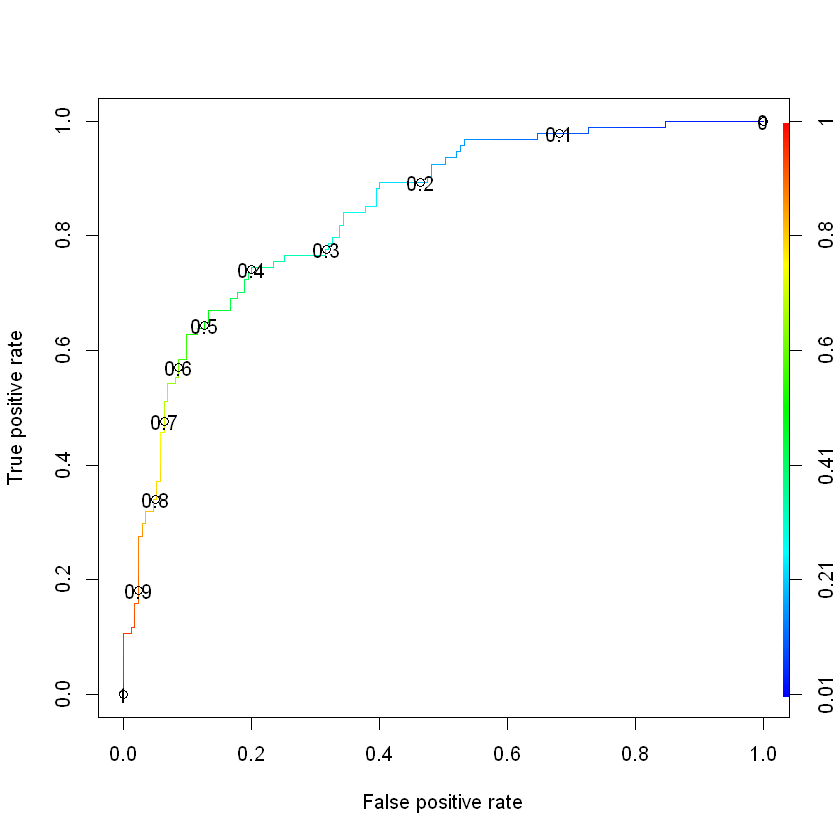

In [40]:
ROCRpredTest=prediction(predictTest,test$Outcome)
ROCRperf = performance( ROCRpredTest, "tpr", "fpr") 
plot(ROCRperf)
plot(ROCRperf, colorize=TRUE)
plot(ROCRperf, colorize=TRUE, print.cutoffs.at = seq(0,1,0.1)) 

In [43]:
auc = as.numeric(performance(ROCRpredTest, "auc")@y.values)
auc

[1] 0.843769

In [10]:
predicttest=predict(glm1,type='response',newdata=test)

ERROR: Error in predict(glm1, type = "response", newdata = test): 找不到对象'glm1'


In [32]:
table(test$Outcome,predicttest>0.6)

   
    FALSE TRUE
  0   162   13
  1    48   46

In [33]:
(162+46)/(13+48+162+46)

[1] 0.7732342

In [34]:
table(df$Outcome)


  0   1 
500 268 

In [35]:
500/(500+268)
#可以看到普通的glm的确增强了预测能力，77.32%比基线的65.10%要高。

[1] 0.6510417

In [44]:
library(xgboost)

Warning message:
"package 'xgboost' was built under R version 3.6.1"
Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice



In [45]:
#接下来使用xgboost试一下
library(Matrix)

Warning message:
"package 'Matrix' was built under R version 3.6.1"
Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand



In [46]:
trainsm=sparse.model.matrix(Outcome~.-1,data=train)

In [47]:
output_vector=train$Outcome

In [48]:
testsm=sparse.model.matrix(Outcome~.-1,data=test)
output_vector2=test$Outcome

In [49]:
bst=xgboost(data=trainsm,label=output_vector,max.depth=1,eta=1,nfold=5,nrounds=12,nthread=4,objective='binary:logistic')

[1]	train-error:0.260521 
[2]	train-error:0.260521 
[3]	train-error:0.260521 
[4]	train-error:0.232465 
[5]	train-error:0.224449 
[6]	train-error:0.228457 
[7]	train-error:0.222445 
[8]	train-error:0.222445 
[9]	train-error:0.210421 
[10]	train-error:0.208417 
[11]	train-error:0.210421 
[12]	train-error:0.204409 


In [50]:

cv.res=xgb.cv(data=trainsm,label=output_vector,max.depth=1,eta=1,nfold=5,nrounds=12,nthread=4,objective='binary:logistic')

[1]	train-error:0.267530+0.012707	test-error:0.312727+0.053366 
[2]	train-error:0.247997+0.012407	test-error:0.298626+0.037318 
[3]	train-error:0.247500+0.011466	test-error:0.290626+0.030767 
[4]	train-error:0.235470+0.018403	test-error:0.290626+0.036147 
[5]	train-error:0.217936+0.011757	test-error:0.288586+0.051959 
[6]	train-error:0.216934+0.012535	test-error:0.278586+0.041850 
[7]	train-error:0.218431+0.016649	test-error:0.272586+0.027540 
[8]	train-error:0.200907+0.009272	test-error:0.262606+0.043629 
[9]	train-error:0.200412+0.015499	test-error:0.262606+0.051220 
[10]	train-error:0.194899+0.013508	test-error:0.258606+0.048046 
[11]	train-error:0.195902+0.013713	test-error:0.262586+0.051867 
[12]	train-error:0.189395+0.020521	test-error:0.264566+0.066358 


In [51]:
pred=predict(bst,newdata=testsm)

In [53]:
table(output_vector2,pred>0.68)

              
output_vector2 FALSE TRUE
             0   159   16
             1    46   48

In [54]:
(159+48)/(164+11+53+41)

[1] 0.7695167

In [55]:
importance = xgb.importance(feature_names = trainsm@Dimnames[[2]], model = bst)

In [56]:
importance

Feature,Gain,Cover,Frequency
Glucose,0.52135898,0.3017029,0.2500000
BMI,0.17494885,0.1679948,0.1666667
Age,0.14132110,0.1585037,0.1666667
DiabetesPedigreeFunction,0.08927240,0.2210247,0.2500000
Insulin,0.07309868,0.1507739,0.1666667


In [ ]:
#哪个变量的影响力最大